## 0) Import libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Dataset: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original
df = pd.read_csv('Data.csv')
df = df.drop('Sample code number', axis=1)

## 1) Base statistics of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
Class,683.0,2.699854,0.954592,2.0,2.0,2.0,4.0,4.0


In [ ]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.groupby(["Class"]).agg("mean") # Class 2 means cancer is benign, while 4 is malignant

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Class,,,,,,,,,
2,2.963964,1.306306,1.414414,1.346847,2.108108,1.346847,2.083333,1.261261,1.065315
4,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510


## 2) Initial analysis

array([[<Axes: title={'center': 'Clump Thickness'}>,
        <Axes: title={'center': 'Uniformity of Cell Size'}>,
        <Axes: title={'center': 'Uniformity of Cell Shape'}>],
       [<Axes: title={'center': 'Marginal Adhesion'}>,
        <Axes: title={'center': 'Single Epithelial Cell Size'}>,
        <Axes: title={'center': 'Bare Nuclei'}>],
       [<Axes: title={'center': 'Bland Chromatin'}>,
        <Axes: title={'center': 'Normal Nucleoli'}>,
        <Axes: title={'center': 'Mitoses'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >, <Axes: >]],
      dtype=object)

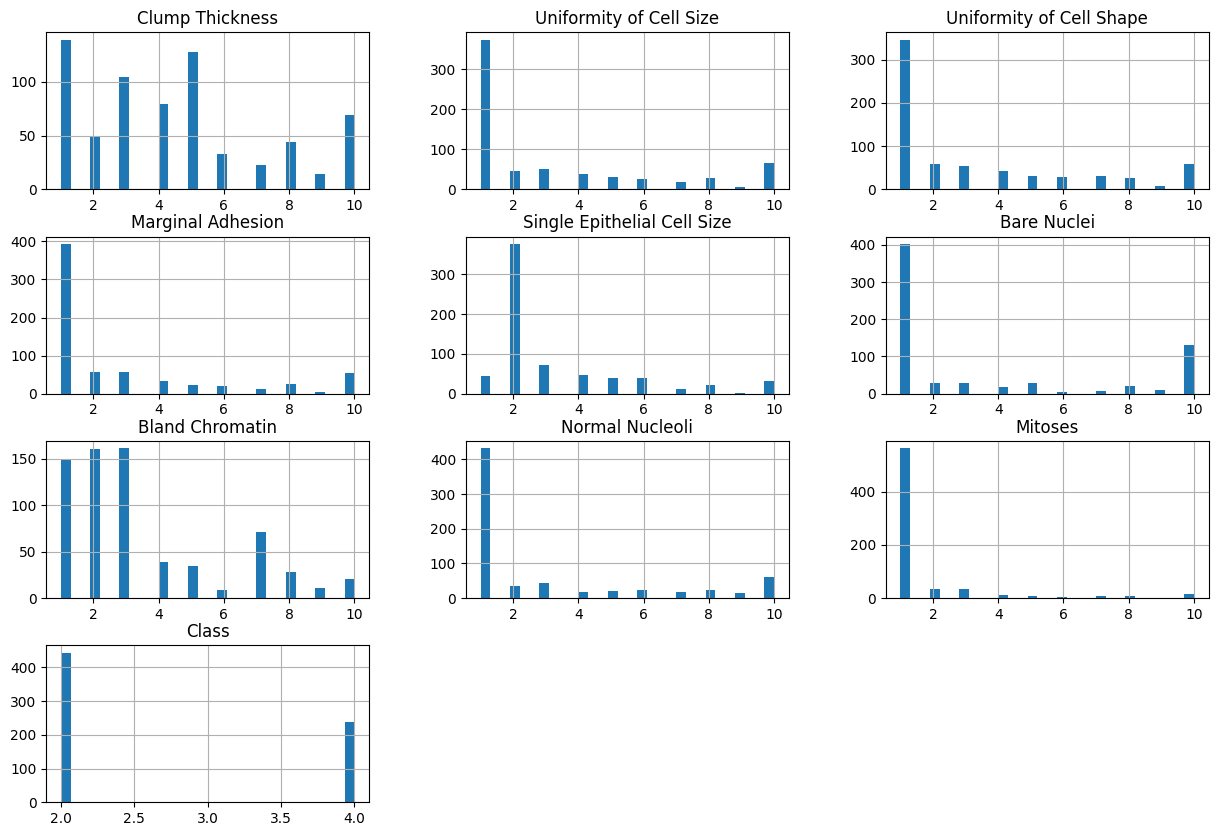

In [ ]:
# Let's draw some histograms

df.hist(bins=30, figsize=(15, 10))

In [ ]:
# Since all columns other than Class have integer values between 1 and 10, I will draw stacked barplots

# cross tab as base for barplot
def crosstab_generator(df, column):
  return pd.crosstab(index=df[column],
                        columns=df['Class'],
                        normalize="index")

# function drawing bar plot for each column
def stacked_plot(df, item, i, j):
  dataset = crosstab_generator(df, item)

  value_counts = list(df[item].value_counts().sort_index())

  ax = dataset.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    ax=axes[i][j])

  # adding labels to bars
  for c in ax.containers:
    labels = [v.get_height() for v in c]
    labels = [int(round(labels[index]*l_item,0))  if labels[index]>0 else '' for index, l_item in enumerate(value_counts)]
    ax.bar_label(c, labels=labels, label_type='center')

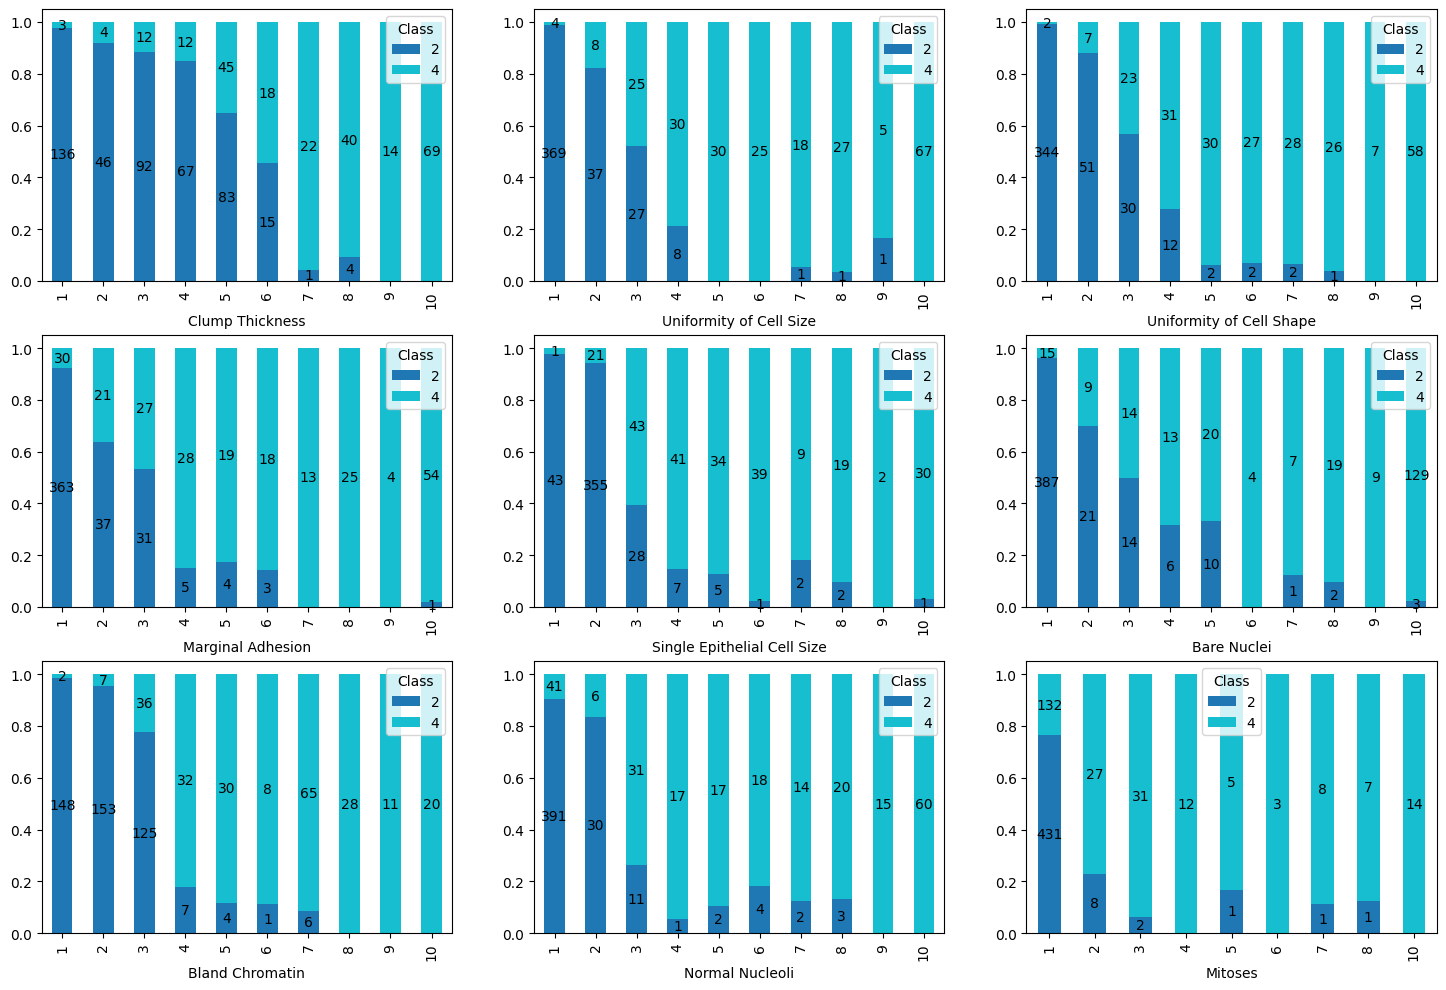

In [ ]:
# Let's populate the plots

fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(18, 12)

col_list = df.columns.values.tolist()
col_list.remove('Class')

for index, item in enumerate(col_list):
  j = index % 3
  i = index // 3

  stacked_plot(df, item, i, j)


<Axes: >

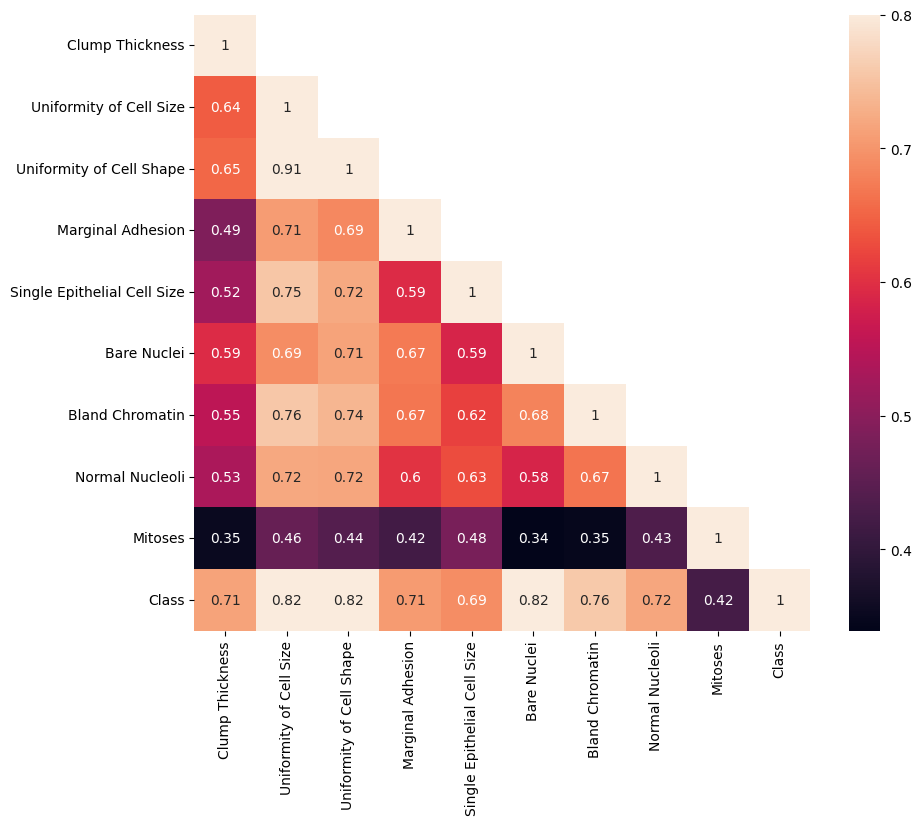

In [ ]:
# Now let's look at correlation matrix
corrMatt = df.corr()

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = 0

fig,ax= plt.subplots()
fig.set_size_inches(10,8)
sn.heatmap(corrMatt,mask=mask, vmax=.8, square=True, annot=True)

## 3) Data preprocessing

In [2]:
# I'll remove column Uniformity of cell size, as it is highly (>0.8) correlated with Uniformity of Cell Shape

X = df.iloc[:, [0,2,3,4,5,6,7,8]].values
y = df.iloc[:,-1].values

X_cols = df.iloc[:, [0,2,3,4,5,6,7,8]].columns

In [ ]:
# There is no missing data and no encoding is needed, as values are already between 1 and 10
print(df.isna().sum())

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [3]:
# Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature scaling (even though in this case it was not mandatory for most of the algorithms)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## 4) Building models

#### 4.1) Logistic regression

In [4]:
# logistic regression model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [5]:
# Let's once check confusion matrix of default model
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[84  3]
 [ 3 47]]


0.9562043795620438

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 96.89 %
Standard Deviation: 2.01 %


In [ ]:
# grid search to find best parameters
from sklearn.model_selection import GridSearchCV
parameters =[{"C":[0.1, 0.25, 0.5, 0.75, 1]},
              {"C":[0.1, 0.25, 0.5, 0.75, 1], "penalty":["l1","l2"], "solver":["liblinear"]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


Best Accuracy: 97.07 %
Best Parameters: {'C': 0.1}


#### 4.2) Support Vector Machine

In [ ]:
# SVM model
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# grid search to find best parameters
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 97.07 %
Best Parameters: {'C': 0.25, 'kernel': 'linear'}


#### 4.3) Random forest

In [ ]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

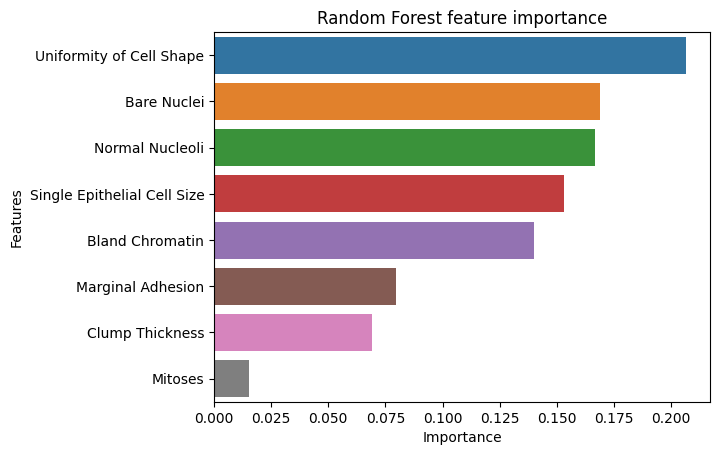

In [ ]:
# Feature importance of default model
feature_imp = pd.Series(classifier.feature_importances_, index=X_cols).sort_values(ascending=False)

sn.barplot(x=feature_imp, y=feature_imp.index)
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Random Forest feature importance')
plt.show()

In [ ]:
# grid search to find best parameters
parameters = {'n_estimators': [100],
              'criterion': ['entropy'],
              'max_depth': [3, 5, 7, 9, 11, 13],
              'min_samples_split': [2, 5, 8, 11],
              'max_features': [2, 3, 4, 5, 6],
              'min_samples_leaf': [1, 2, 3]}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 97.80 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 11, 'n_estimators': 100}


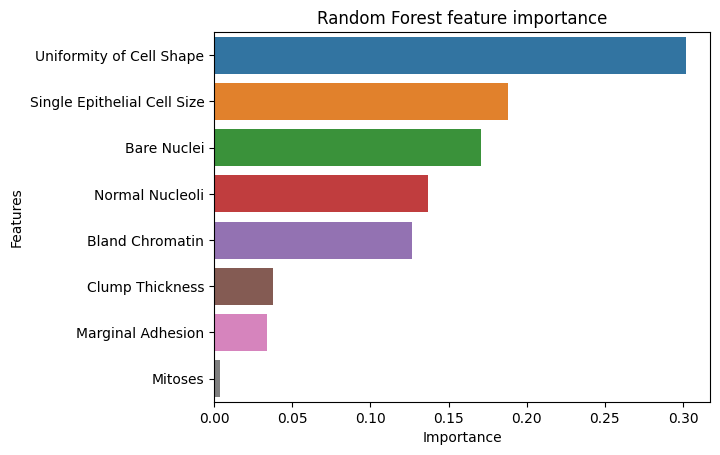

In [ ]:
# Feature importance of the best model
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0,
                                       max_depth = 3, min_samples_split = 11, max_features = 3, min_samples_leaf = 3)
classifier_rf.fit(X_train, y_train)

feature_imp_rf = pd.Series(classifier_rf.feature_importances_, index=X_cols).sort_values(ascending=False)

sn.barplot(x=feature_imp_rf, y=feature_imp_rf.index)
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Random Forest feature importance')
plt.show()

#### 4.4) Xgboost

In [ ]:
# Xgboost
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
classifier.fit(X_train, y_train)


GradientBoostingClassifier(random_state=0)

In [ ]:
# grid search to find best parameters
parameters = {'n_estimators': [100],
              'learning_rate': [0.01, 0.05, 0.1],
              'subsample': [0.8],
              'max_depth': [3, 5, 7, 9, 11, 13],
              'min_samples_split': [2, 5, 8, 11],
              'max_features': [2, 3, 4, 5, 6],
              'min_samples_leaf': [1, 2, 3]}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 97.62 %
Best Parameters: {'learning_rate': 0.1, 'max_depth': 13, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 100, 'subsample': 0.8}


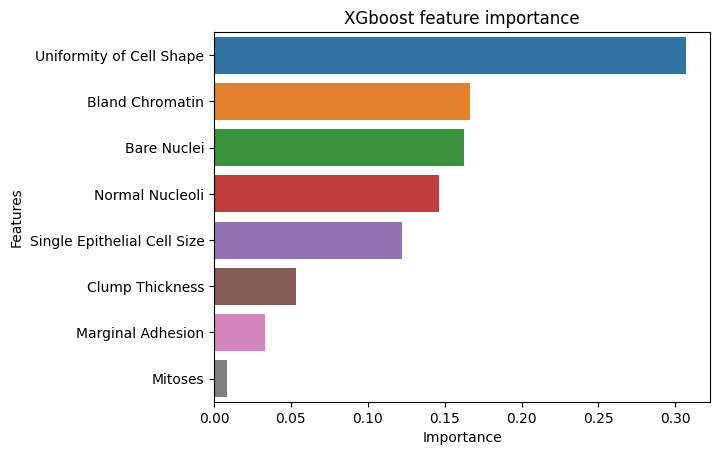

In [ ]:
# Feature importance of the best model
classifier_xg = GradientBoostingClassifier(n_estimators = 100, subsample = 0.8, random_state = 0,
                                       max_depth = 13, min_samples_split = 11, max_features = 2, min_samples_leaf = 1, learning_rate = 0.1)
classifier_xg.fit(X_train, y_train)

feature_imp_xg = pd.Series(classifier_xg.feature_importances_, index=X_cols).sort_values(ascending=False)

sn.barplot(x=feature_imp_xg, y=feature_imp_xg.index)
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('XGboost feature importance')
plt.show()

#### 4.5) ANN

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_ann = le.fit_transform(y_train)
y_test_ann = le.transform(y_test)

In [ ]:
import tensorflow as tf

# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
ann.fit(X_train, y_train_ann, batch_size = 30, epochs = 100)

Epoch 1/100
19/19 [==============================] - 2s 4ms/step - loss: 0.7445 - accuracy: 0.6593
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.7064 - accuracy: 0.6905
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.7106
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6254 - accuracy: 0.7564
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5733 - accuracy: 0.7949
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5148 - accuracy: 0.8498
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4516 - accuracy: 0.8919
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3795 - accuracy: 0.9322
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 0.3058 - accuracy: 0.9524
Epoch 10/100
19/19 [==============================] - 0s 3ms/step - loss: 0.2442 - accuracy: 0.9560
Epoch 11/


## 5) Model selection

In [ ]:
# make a list of models
models = []
models.append(('Logistic regression', LogisticRegression(random_state = 0, C = 0.1)))
models.append(("SVM", SVC(kernel = 'linear', random_state = 0, C = 0.25)))
models.append(("Random forest", RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0,
                                       max_depth = 3, min_samples_split = 11, max_features = 3, min_samples_leaf = 3)))
models.append(("Xgboost", GradientBoostingClassifier(n_estimators = 100, subsample = 0.8, random_state = 0,
                                       max_depth = 13, min_samples_split = 11, max_features = 2, min_samples_leaf = 1, learning_rate = 0.1)))


In [ ]:
# Verify accuracy on test set for all models
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print("ANN" + accuracy_score(y_test_ann, y_pred))

Logistic regression: (0.956204)
SVM: (0.948905)
Random forest: (0.970803)
XGboost: (0.978102)
5/5 [==============================] - 0s 3ms/step
0.9708029197080292


In [ ]:
# Making the Confusion Matrix for chosen model (Xgboost, as it has the highest accuracy)
y_pred = classifier_xg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
# FN = cm[1, 0]; Positives = 0+50

tn, fp, fn, tp = cm.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

[[84  3]
 [ 0 50]]
True Negatives:  84
False Positives:  3
False Negatives:  0
True Positives:  50


## 6) ROC curve


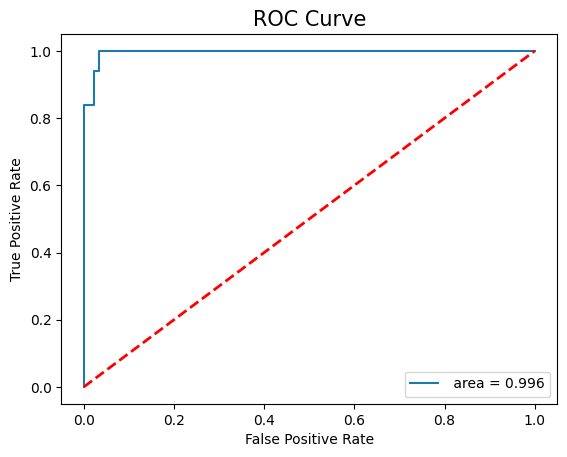

In [ ]:
# Let's plot the ROC curve of the chosen model
from sklearn.metrics import roc_curve, auc

y_pred_prob = classifier_xg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label = 4)
roc_auc = auc(fpr,tpr)

fig, ax = plt.subplots()
ax.plot(fpr,tpr, label = " area = {:0.3f}".format(roc_auc))
ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax.set_xlabel("False Positive Rate", fontsize = 10)
ax.set_ylabel("True Positive Rate", fontsize = 10)
ax.set_title("ROC Curve", fontsize = 15)
ax.legend(loc = 'best')